In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [36]:
def line_slope(x_1,y_1,x_2,y_2):
    if(y_1 == y_2):
        return 0
    return abs((y_2 - y_1) / (x_2 - x_1))

In [37]:
def filter_line(lines):
    a = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if( x2 == x1):
            continue
        slope = (y2 - y1) / (x2 - x1)
        if(abs(slope) < 0.5):
            a.append(line)
    return a

In [38]:
def select_line_slope(lines):
    select_line = lines[0][0]
    for line in lines[1:]:
        x1, y1, x2, y2 = select_line
        x3, y3, x4, y4 = line[0]
        if(x3==x4):
            continue
        if(line_slope(x3,y3,x4,y4) < line_slope(x1,y1,x2,y2)):
            # if(slope(x3,y3,x4,y4) - slope(x1,y1,x2,y2) < 0.005):
            if(line_slope(x1,y1,x2,y2) - line_slope(x3,y3,x4,y4) < 0.4): # old 0.05
                if(math.dist([x1,y1],[x2,y2]) - 10 > math.dist([x3,y3],[x4,y4])):
                    continue
            select_line = line[0]
        else:
            if(line_slope(x3,y3,x4,y4) - line_slope(x1,y1,x2,y2) < 0.4):
                if(math.dist([x3,y3],[x4,y4]) - 10 > math.dist([x1,y1],[x2,y2])):
                    select_line = line[0]
    return select_line

In [39]:
def midpoint(p1, p2):
    return (p1+p2)/2  

001
[224.5 163.5]


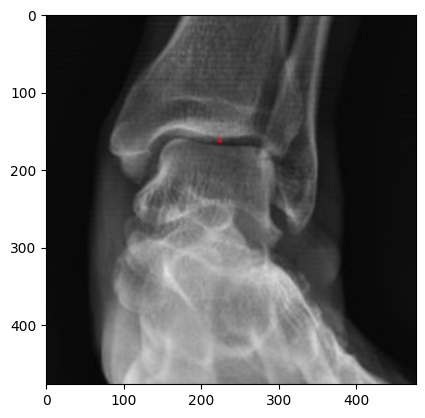

002
[239.  294.5]


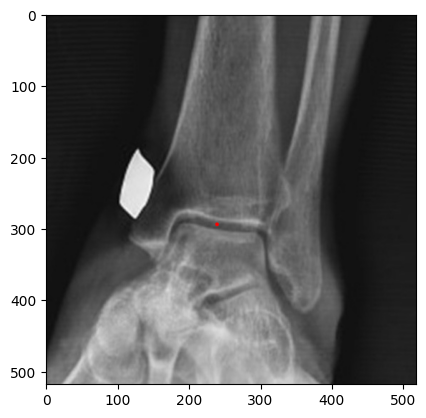

003
[184.  176.5]


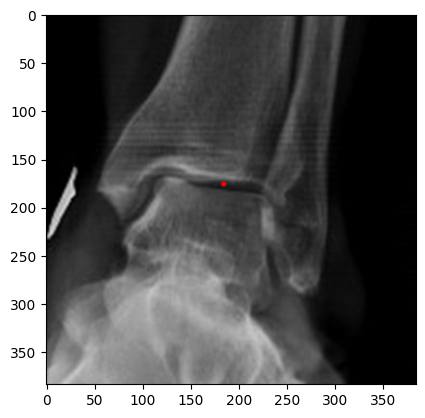

004
[201.  146.5]


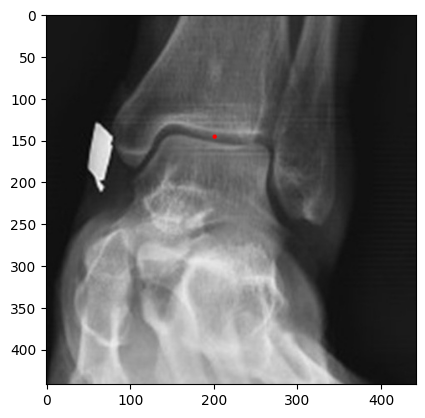

005
[199.5 225. ]


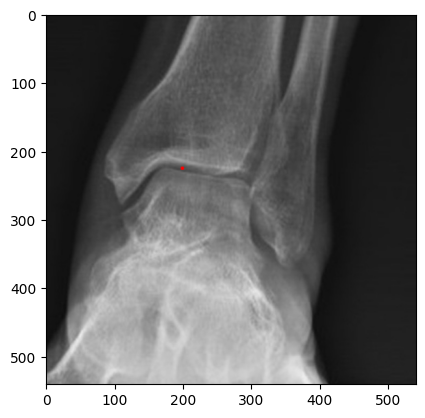

006
[229. 186.]


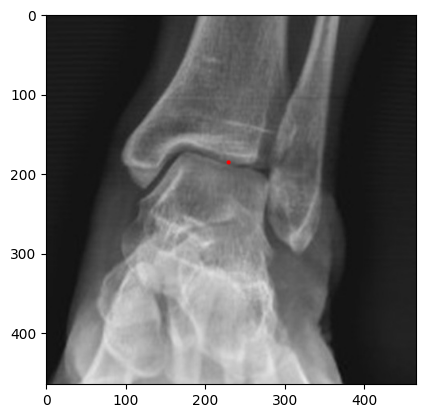

007
[224.5 258. ]


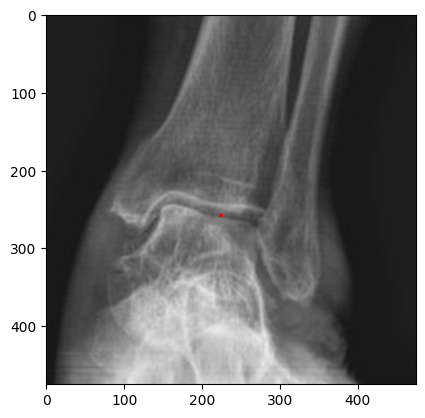

008
[204.5 225. ]


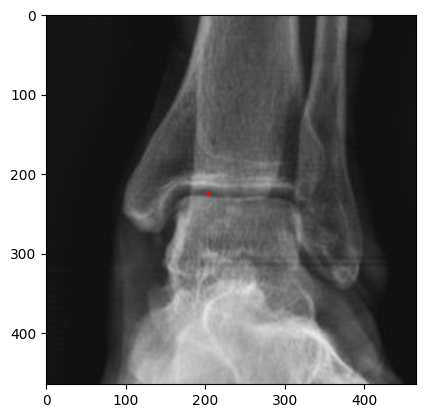

009
[227.5 257. ]


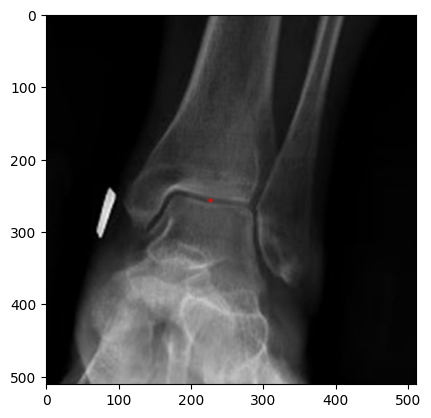

010
[209.5 209. ]


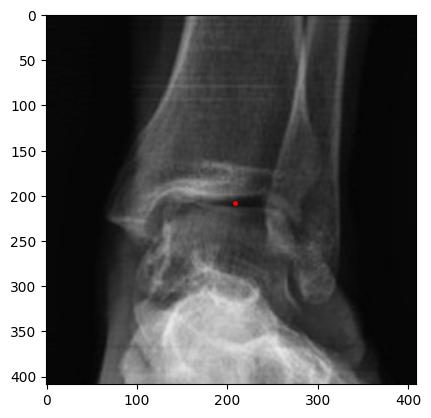

011
[222.5 234. ]


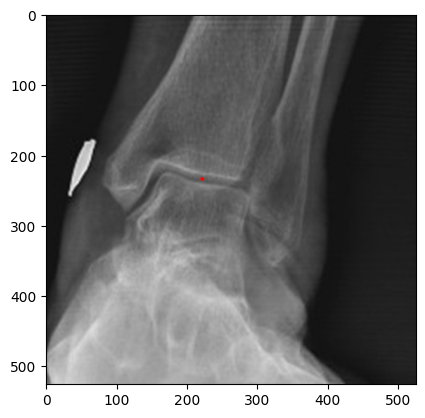

012
[114.5 163.5]


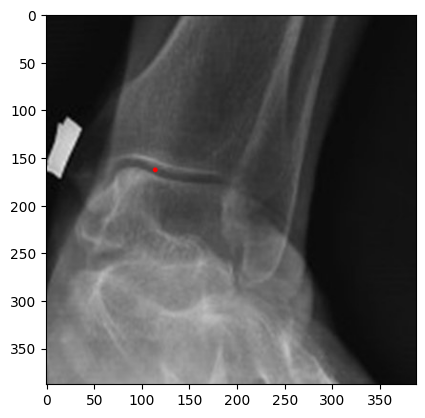

013
[208. 207.]


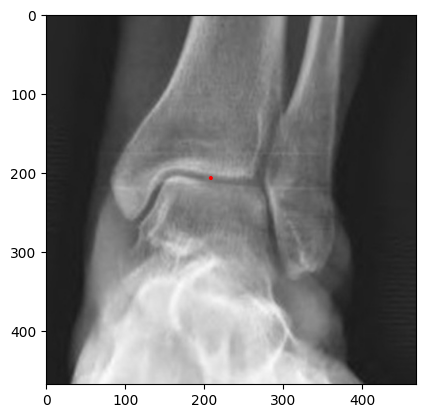

014
[191. 219.]


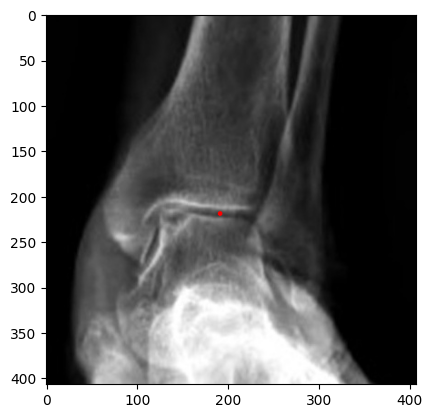

015
[227.5 220.5]


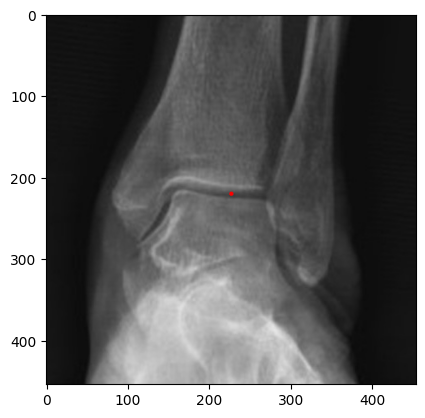

016
[206. 217.]


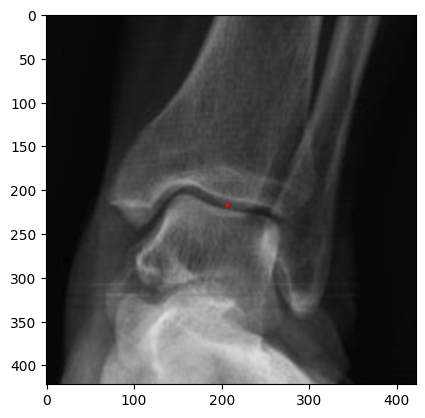

017
[162. 292.]


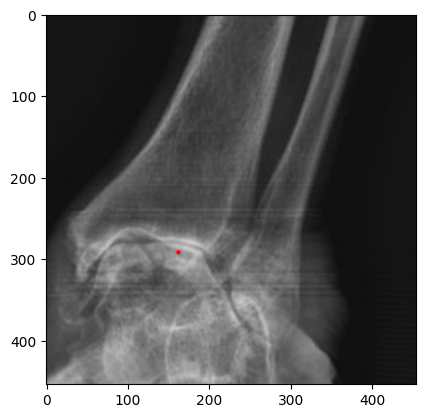

018
[203.5 187.5]
yes


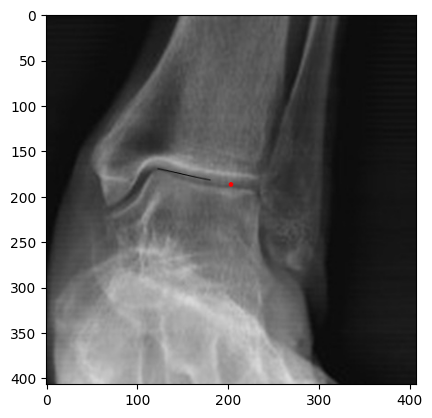

019
[221. 269.]


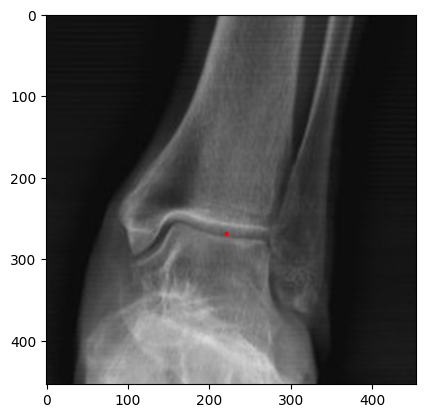

020
[239.5 276.5]


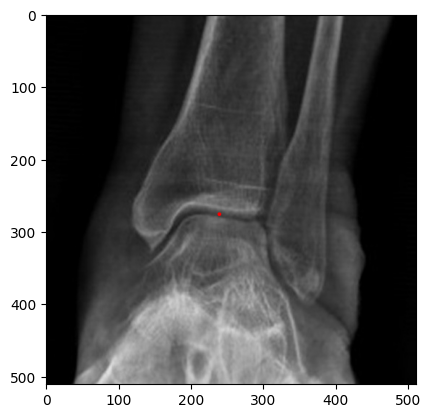

021
[256.5 236. ]


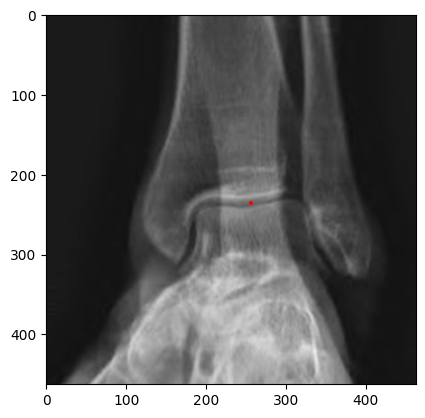

022
[209.5 206. ]


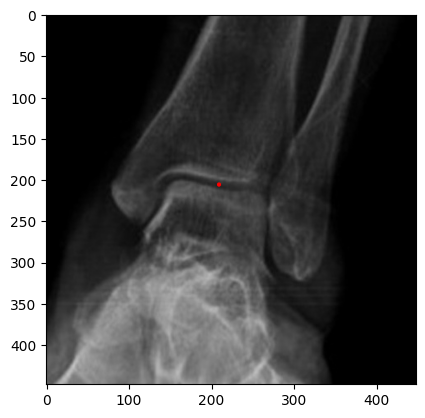

023
[252.5 210.5]


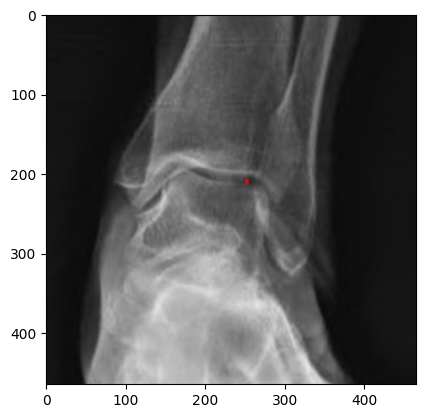

024
[487. 513.]


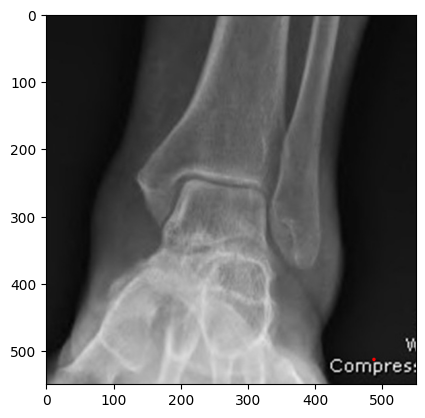

025
[233.5 238.5]


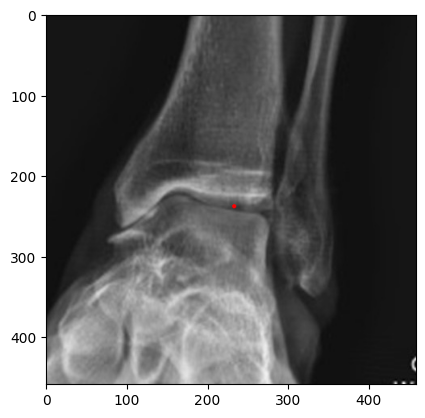

026
[199.  156.5]


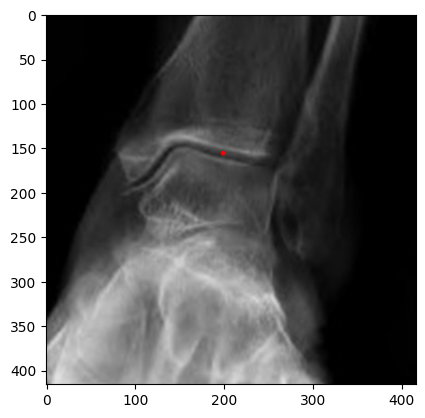

027
[228. 228.]


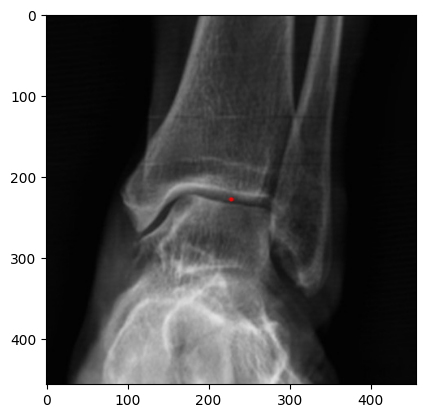

028
[171. 192.]


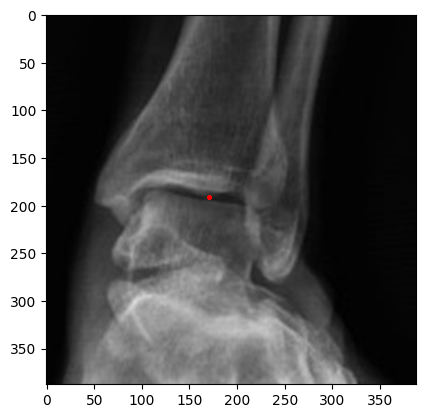

029
[240.5 277.5]


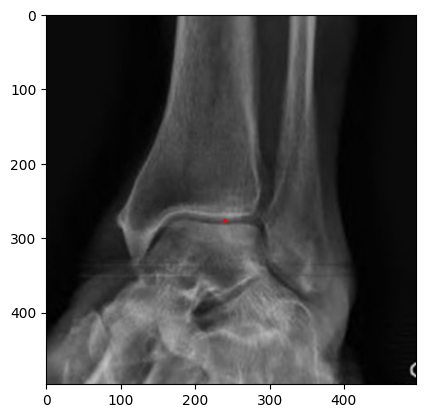

030
[289. 266.]


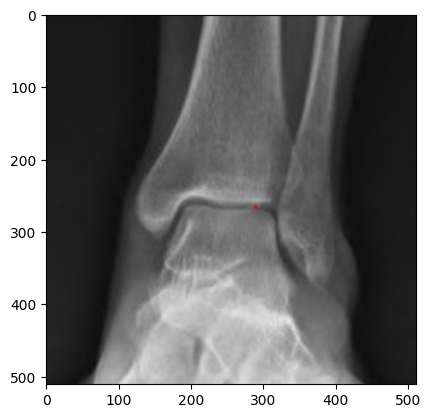

031
[238.  233.5]


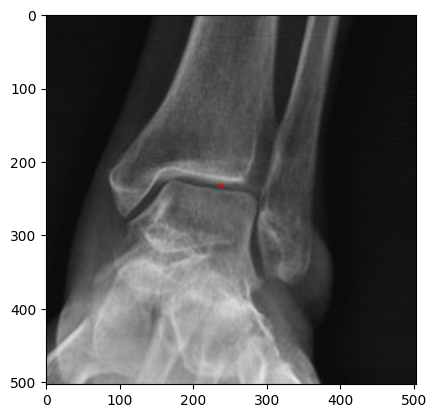

032
[213.  204.5]


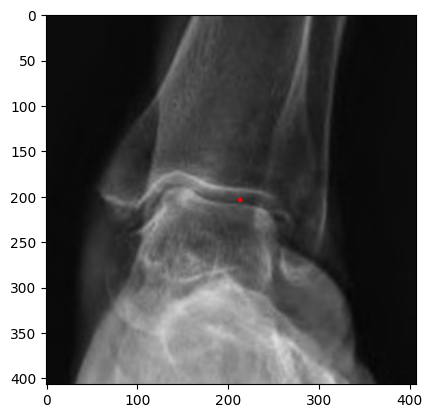

033
[208.  309.5]


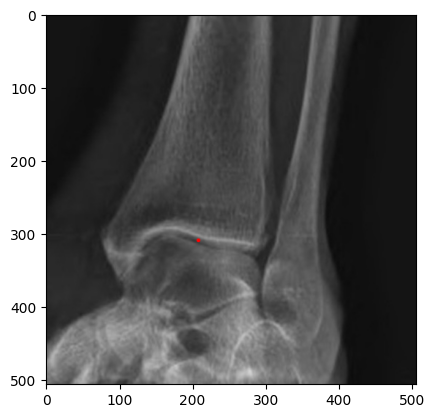

034
[269.5 230. ]


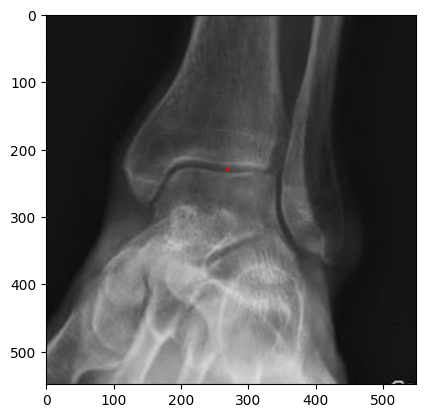

035
[223. 244.]


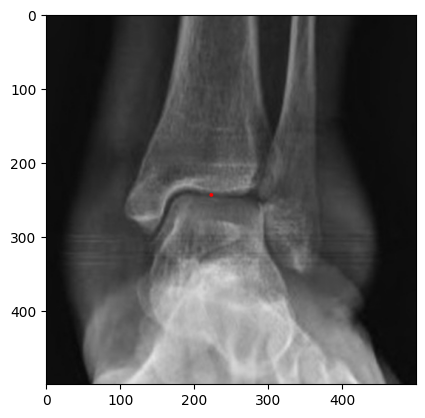

036
[198. 193.]
yes


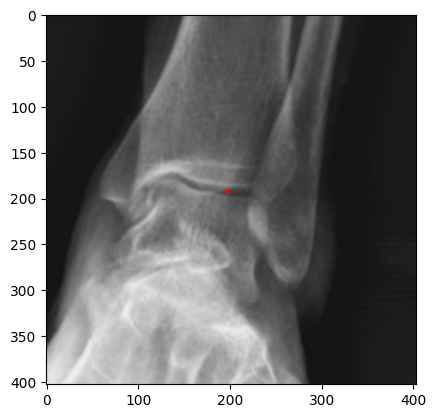

037
[232.  213.5]


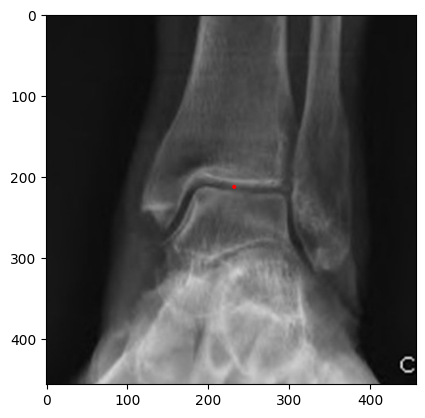

038
[226.  224.5]


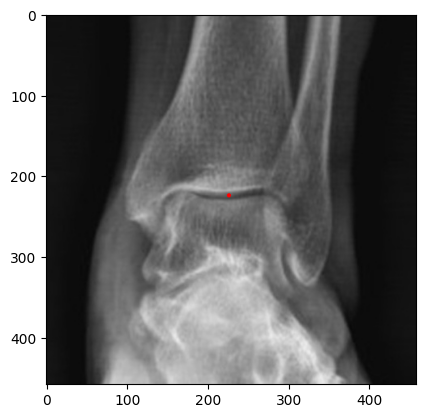

039
[247.5 214. ]


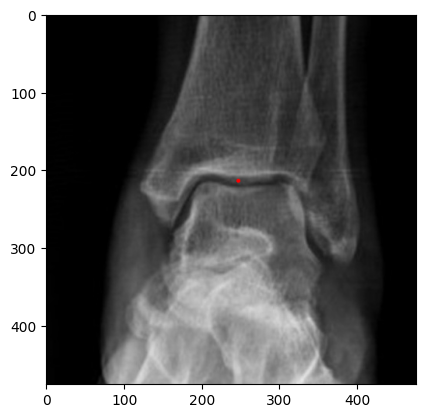

040
[215.  242.5]


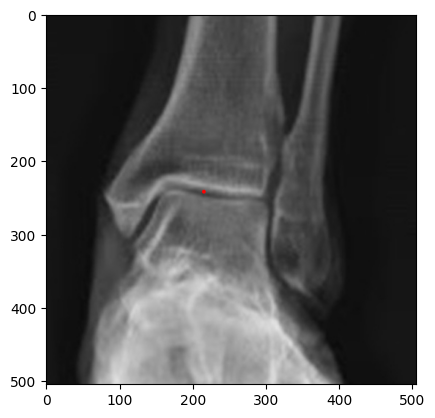

In [43]:
for i in range(1,41):
    a = False
    num = "{:03d}".format(i)
    print(num)
    img = cv2.imread(f"./dev_talus_res/right/{num}.jpg")
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width = imgGray.shape
    th3 = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,31,5)

    knee = cv2.medianBlur(th3,7)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    knee_erosion = cv2.erode(knee,kernel,iterations = 1)

    lines = cv2.HoughLinesP(knee_erosion, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=1) # old theta np.pi/180

    filtered_lines = filter_line(lines)
    if(len(filtered_lines) == 0):
        a = True
        kernel = np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]], dtype=np.uint8)
        knee_dilate = cv2.dilate(knee_erosion,kernel,iterations = 1)
        lines = cv2.HoughLinesP(knee_dilate, 1, np.pi/180, threshold=50, minLineLength=20, maxLineGap=1) # old theta np.pi/180
        filtered_lines = filter_line(lines)


    selected_line = select_line_slope(filtered_lines)

    x1, y1, x2, y2 = selected_line
    m = midpoint(np.array([x1,y1]), np.array([x2,y2]))
    print(m)
    if(a):
        print("yes")
    image = cv2.circle(img, (int(m[0]), int(m[1])), 1, [255,0,0], 2)
    plt.imshow(image)
    plt.show()